# 第3章 常用函数

本章涵盖以下内容：
- 数组相关的函数；
- 从文件中载入数据；
- 将数组写入文件；
- 简单的数学和统计分析函数。

## 3.1 文件读写

　　首先，我们来学习使用NumPy读写文件。通常情况下，数据是以文件形式存储的。学会读写文件是深入学习NumPy的基础。

## 3.2 动手实践：读写文件

　　(1) 单位矩阵，即主对角线上的元素均为1，其余元素均为0的正方形矩阵。在NumPy中可以用eye函数创建一个这样的二维数组，我们只需要给定一个参数，用于指定矩阵中1的元素个数。
例如，创建2×2的数组：

In [1]:
import numpy as np

i2 = np.eye(2)
print(i2)

[[ 1.  0.]
 [ 0.  1.]]


　　(2) 使用savetxt函数将数据存储到文件中，当然我们需要指定文件名以及要保存的数组。

In [5]:
np.savetxt("./Data/eye.txt", i2)

## 3.3 CSV 文件

　　CSV（Comma-Separated Value，逗号分隔值）格式是一种常见的文件格式。通常，数据库的转存文件就是CSV格式的，文件中的各个字段对应于数据库表中的列。众所周知，电子表格软件（如Microsoft Excel）可以处理CSV文件。

## 3.4 动手实践：读入 CSV 文件

　　可以看到，数据存储在data.csv文件中，我们设置分隔符为,（英文标点逗号），因为我们要处理一个CSV文件。 usecols的参数为一个元组，以获取第7字段至第8字段的数据，也就是股票的收盘价和成交量数据。 unpack参数设置为True，意思是分拆存储不同列的数据，即分别将收盘价和成交量的数组赋值给变量c和v。

In [6]:
c, v = np.loadtxt('./Data/data.csv', delimiter=',', usecols=(6,7), unpack=True)

In [7]:
c

array([ 336.1 ,  339.32,  345.03,  344.32,  343.44,  346.5 ,  351.88,
        355.2 ,  358.16,  354.54,  356.85,  359.18,  359.9 ,  363.13,
        358.3 ,  350.56,  338.61,  342.62,  342.88,  348.16,  353.21,
        349.31,  352.12,  359.56,  360.  ,  355.36,  355.76,  352.47,
        346.67,  351.99])

In [8]:
v

array([ 21144800.,  13473000.,  15236800.,   9242600.,  14064100.,
        11494200.,  17322100.,  13608500.,  17240800.,  33162400.,
        13127500.,  11086200.,  10149000.,  17184100.,  18949000.,
        29144500.,  31162200.,  23994700.,  17853500.,  13572000.,
        14395400.,  16290300.,  21521000.,  17885200.,  16188000.,
        19504300.,  12718000.,  16192700.,  18138800.,  16824200.])

## 3.5 成交量加权平均价格（VWAP）

　　VWAP（Volume-Weighted Average Price，成交量加权平均价格）是一个非常重要的经济学量，它代表着金融资产的“平均”价格。某个价格的成交量越高，该价格所占的权重就越大。 VWAP就是以成交量为权重计算出来的加权平均值，常用于算法交易。

## 3.6 动手实践：计算成交量加权平均价格

我们将按如下步骤计算。  
(1) 将数据读入数组。  
(2) 计算VWAP。

In [13]:
import numpy as np
c,v=np.loadtxt('./Data/data.csv', delimiter=',', usecols=(6,7), unpack=True)
vwap = np.average(c, weights=v)
print("VWAP =", vwap)

VWAP = 350.589549353


#### 3.6.1 算术平均值函数

In [18]:
print("mean =", np.mean(c))

mean = 351.037666667


#### 3.6.2 时间加权平均价格

In [19]:
t = np.arange(len(c))
print("twap =", np.average(c, weights=t))

twap = 352.428321839


## 3.7 取值范围

　　通常，我们不仅仅想知道一组数据的平均值， 还希望知道数据的极值以及完整的取值范围——最大值和最小值。我们的股价示例数据中已经包含了每天的股价范围——最高价和最低价。但是，我们还需要知道最高价的最大值以及最低价的最小值。不然，我们怎样才能知道自己的股票是赚了还是赔了呢？

## 3.8 动手实践：找到最大值和最小值

##### (1) 首先，需要再次读入数据，将每日最高价和最低价的数据载入数组：

In [20]:
h, l = np.loadtxt('./Data/data.csv', delimiter=',', usecols=(4,5), unpack=True)

##### (2) 下方的代码即可获取价格区间：

In [21]:
print("highest =", np.max(h))
print("lowest =", np.min(l))

highest = 364.9
lowest = 333.53


##### (3) NumPy中有一个ptp函数可以计算数组的取值范围。该函数返回的是数组元素的最大值和最小值之间的差值。也就是说，返回值等于max(array) - min(array)。调用ptp函数：

In [22]:
print("Spread high price", np.ptp(h))
print("Spread low price", np.ptp(l))

Spread high price 24.86
Spread low price 26.97


## 3.9 统计分析

　　股票交易者对于收盘价的预测很感兴趣。常识告诉我们，这个价格应该接近于某种均值。算数平均值和加权平均值都是在数值分布中寻找中心点的方法。然而，它们对于异常值（outlier）既不鲁棒也不敏感。举例来说，如果我们有一个高达100万美元的收盘价，这将影响到我们的计算结果。

## 3.10 动手实践：简单统计分析

##### (1) 计算收盘价的中位数。创建一个新的Python脚本文件，命名为simplestats.py。你已经知道如何从CSV文件中读取数据到数组中了，因此只需要复制一行代码并确保只获取收盘价数据即可，如下所示：

In [23]:
c = np.loadtxt('./Data/data.csv', delimiter=',', usecols=(6,), unpack=True)

##### (2) 一个叫做median的函数将帮助我们找到中位数。我们调用它并立即打印出结果。添加下面这行代码：

In [24]:
print("median =", np.median(c))

median = 352.055


(3) 既然这是我们首次使用median函数，我们来检查一下结果是否正确。这可不是因为我
们多疑！当然，我们可以将整个数据文件浏览一遍并人工找到正确的答案，但那样太无趣了。我们将对价格数组进行排序，并输出排序后居于中间位置的值，这也就是模拟了寻找中位数的算法。 msort函数可以帮我们完成第一步。我们将调用这个函数，获得排序后的数组，并输出结果。

In [27]:
sorted_close = np.msort(c)
print("sorted =", sorted_close)

sorted = [ 336.1   338.61  339.32  342.62  342.88  343.44  344.32  345.03  346.5
  346.67  348.16  349.31  350.56  351.88  351.99  352.12  352.47  353.21
  354.54  355.2   355.36  355.76  356.85  358.16  358.3   359.18  359.56
  359.9   360.    363.13]


In [39]:
N = len(c)
print("middle = ", sorted_close[int((N - 1)/2)])

middle =  351.99


(4) 咦，这个值和median函数给出的值不一样，这是怎么回事？经过仔细观察我们发现，
median函数返回的结果甚至根本没有在我们的数据文件里出现过。这就更奇怪了！在给NumPy
团队提交bug报告之前，我们先来看下文档。原来这个谜团很容易解开。原因就在于我们的简单算法模拟只对长度为奇数的数组奏效。对于长度为偶数的数组，中位数的值应该等于中间那两个数的平均值。因此，输入如下代码：

In [41]:
print("average middle =", (sorted_close[int(N /2)] + sorted_close[int((N - 1) / 2)]) / 2)

average middle = 352.055


(5) 另外一个我们关心的统计量就是方差。方差能够体现变量变化的程度。在我们的例子中，
方差还可以告诉我们投资风险的大小。那些股价变动过于剧烈的股票一定会给持有者制造麻烦。
在NumPy中，计算方差只需要一行代码，看下面：

In [42]:
print("variance =", np.var(c))

variance = 50.1265178889


(6) 既然我们不相信NumPy的函数，那就再次根据文档中方差的定义来复核一下结果。注意，
这里方差的定义可能与你在统计学的书中看到的不一致，但这个定义在统计学上更为通用。

In [43]:
print("variance from definition =", np.mean((c - c.mean()) ** 2))

variance from definition = 50.1265178889


## 3.11 股票收益率

　　在学术文献中，收盘价的分析常常是基于股票收益率和对数收益率的。简单收益率是指相邻两个价格之间的变化率，而对数收益率是指所有价格取对数后两两之间的差值。我们在高中学习过对数的知识，“a”的对数减去“b”的对数就等于“a除以b”的对数。因此，对数收益率也可以用来衡量价格的变化率。注意，由于收益率是一个比值，例如我们用美元除以美元（也可以是其他货币单位），因此它是无量纲的。总之，投资者最感兴趣的是收益率的方差或标准差，因为这代表着投资风险的大小。

## 3.12 动手实践：分析股票收益率

(1) 首先，我们来计算简单收益率。 NumPy中的diff函数可以返回一个由相邻数组元素的差值构成的数组。这有点类似于微积分中的微分。为了计算收益率，我们还需要用差值除以前一天的价格。不过这里要注意， diff返回的数组比收盘价数组少一个元素。经过仔细考虑，我们使用如下代码：

## 3.13 日期分析

## 3.14 动手实践：分析日期数据

In [53]:
dates, close = np.loadtxt('./Data/data.csv', delimiter=',', usecols=(1,6), unpack=True)

ValueError: could not convert string to float: b'28-01-2011'

(1) 显然， NumPy尝试把日期转换成浮点数。我们需要做的是显式地告诉NumPy怎样来转换日期，而这需要用到loadtxt函数中的一个特定的参数。这个参数就是converters，它是一本数据列和转换函数之间进行映射的字典。

In [64]:
from datetime import datetime

def datestr2num(s):
    return datetime.strptime(s.decode('ascii'), "%d-%m-%Y").date().weekday()

dates, close = np.loadtxt('./Data/data.csv', delimiter=',', usecols=(1,6), converters={1:datestr2num}, unpack=True)
print("Dates =", dates)

averages = np.zeros(5)

for i in range(5):
    indices = np.where(dates == i)
    prices = np.take(close, indices)
    avg = np.mean(prices)
    print("Day", i, "prices", prices, "Average", avg)
    averages[i] = avg
    
top = np.max(averages)
print("Highest average", top)
print("Top day of the week", np.argmax(averages))

bottom = np.min(averages)
print("Lowest average", bottom)
print("Bottom day of the week", np.argmin(averages))

Dates = [ 4.  0.  1.  2.  3.  4.  0.  1.  2.  3.  4.  0.  1.  2.  3.  4.  1.  2.
  3.  4.  0.  1.  2.  3.  4.  0.  1.  2.  3.  4.]
Day 0 prices [[ 339.32  351.88  359.18  353.21  355.36]] Average 351.79
Day 1 prices [[ 345.03  355.2   359.9   338.61  349.31  355.76]] Average 350.635
Day 2 prices [[ 344.32  358.16  363.13  342.62  352.12  352.47]] Average 352.136666667
Day 3 prices [[ 343.44  354.54  358.3   342.88  359.56  346.67]] Average 350.898333333
Day 4 prices [[ 336.1   346.5   356.85  350.56  348.16  360.    351.99]] Average 350.022857143
Highest average 352.136666667
Top day of the week 2
Lowest average 350.022857143
Bottom day of the week 4


## 3.17 真实波动幅度均值（ATR）

　　ATR（Average True Range，真实波动幅度均值）是一个用来衡量股价波动性的技术指标。ATR的计算并不是重点，只是作为演示几个NumPy函数的例子，包括maximum函数。

## 3.18 动手实践：计算真实波动幅度均值

(1) ATR是基于N个交易日的最高价和最低价进行计算的，通常取最近20个交易日。

In [52]:
import sys

h, l, c = np.loadtxt('./Data/data.csv', delimiter=',', usecols=(4,5,6), unpack=True)

N = int(sys.argv[1])
h = h[-N:]
l = l[-N:]

print("len(h)", len(h), "len(l)", len(l),)
print("Close", c)
previousclose = c[-N -1: -1]

ValueError: invalid literal for int() with base 10: '-f'

## 3.27 趋势线

趋势线，是根据股价走势图上很多所谓的枢轴点绘成的曲线。顾名思义，趋势线描绘的是价格变化的趋势。过去的股民们在纸上用手绘制趋势线，而现在我们可以让计算机来帮助我们作图。在这一节的教程中，我们将用非常简易的方法来绘制趋势线，可能在实际生活中不是很奏效，但这应该能将趋势线的原理阐述清楚。

## 3.28 动手实践：绘制趋势线

(1) 首先，我们需要确定枢轴点的位置。这里，我们假设它们等于最高价、最低价和收盘价的算术平均值。

In [6]:
h, l, c = np.loadtxt('./Data/data.csv', delimiter=',', usecols=(4, 5, 6), unpack=True)

pivots = (h + l + c) / 3
print("Pivots", pivots)

Pivots [ 338.01        337.88666667  343.88666667  344.37333333  342.07666667
  345.57        350.92333333  354.29        357.34333333  354.18
  356.06333333  358.45666667  359.14        362.84333333  358.36333333
  353.19333333  340.57666667  341.95666667  342.13333333  347.13
  353.12666667  350.90333333  351.62333333  358.42333333  359.34666667
  356.11333333  355.13666667  352.61        347.11333333  349.77      ]


(2) 定义一个函数用直线y= at + b来拟合数据，该函数应返回系数a和b。这里需要再次用到linalg包中的lstsq函数。将直线方程重写为y = Ax的形式，其中A = [t 1]， x = [a b]。使用ones_like和vstack函数来构造数组A。

In [ ]:
def fit_line(t, y):
    A = np.vstack([])

#### 刚才做了些什么

Pivots [ 338.01        337.88666667  343.88666667  344.37333333  342.07666667
  345.57        350.92333333  354.29        357.34333333  354.18
  356.06333333  358.45666667  359.14        362.84333333  358.36333333
  353.19333333  340.57666667  341.95666667  342.13333333  347.13
  353.12666667  350.90333333  351.62333333  358.42333333  359.34666667
  356.11333333  355.13666667  352.61        347.11333333  349.77      ]
Condition [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True]
[-1.45056631 -1.46120924 -1.47185218 -1.48249512 -1.49313805 -1.50378099
 -1.51442393 -1.52506686 -1.5357098  -1.54635274 -1.55699567 -1.56763861
 -1.57828155 -1.58892448 -1.59956742 -1.61021036 -1.62085329 -1.63149623
 -1.64213917 -1.6527821  -1.66342504 -1.67406798 -1.68471091 -1.69535385
 -1.70599679 -1.71663972 -1.72728266 -1.7379256  -1.74856853 -1.75921147]
[ 336.1   339.32  

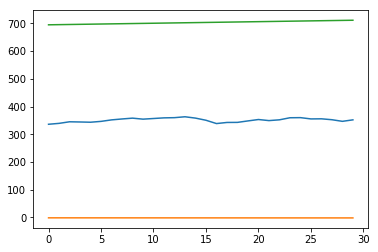

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def fit_line(t, y):
    A = np.stack([t, np.ones_like(t)]).T
    return np.linalg.lstsq(A, y)[0]

h, l, c = np.loadtxt('./Data/data.csv', delimiter=',', usecols=(4, 5, 6), unpack=True)
pivots = (h + l + c) / 3
print("Pivots", pivots)

t = np.arange(len(c))
sa, sb = fit_line(t, pivots - (h - 1))
ra, rb = fit_line(t, pivots + (h - 1))

support = sa * t + sb
resistance = ra * t + rb

condition = (c > support) & (c < resistance)
print("Condition", condition)
between_bands = np.where(condition)
print(support[between_bands])
print(c[between_bands])
print(resistance[between_bands])
between_bands = len(np.ravel(between_bands))
print("Number points between bands", between_bands)
print("Ratio between bands", float(between_bands) / len(c))

print("Tomorrows support", sa * (t[-1] + 1) + sb)
print("Tomorrows resistance", ra * (t[-1] + 1) + rb)

a1 = c[c > support]
a2 = c[c < resistance]
print("Number of points between bands 2nd approach", len(np.intersect1d(a1, a2)))

plt.plot(t, c)
plt.plot(t, support)
plt.plot(t, resistance)
plt.show()

In [12]:
h

array([ 344.4 ,  340.04,  345.65,  345.25,  344.24,  346.7 ,  353.25,
        355.52,  359.  ,  360.  ,  357.8 ,  359.48,  359.97,  364.9 ,
        360.27,  359.5 ,  345.4 ,  344.64,  345.15,  348.43,  355.05,
        355.72,  354.35,  359.79,  360.29,  361.67,  357.4 ,  354.76,
        349.77,  352.32])

In [13]:
l

array([ 333.53,  334.3 ,  340.98,  343.55,  338.55,  343.51,  347.64,
        352.15,  354.87,  348.  ,  353.54,  356.71,  357.55,  360.5 ,
        356.52,  349.52,  337.72,  338.61,  338.37,  344.8 ,  351.12,
        347.68,  348.4 ,  355.92,  357.75,  351.31,  352.25,  350.6 ,
        344.9 ,  345.  ])

In [14]:
c

array([ 336.1 ,  339.32,  345.03,  344.32,  343.44,  346.5 ,  351.88,
        355.2 ,  358.16,  354.54,  356.85,  359.18,  359.9 ,  363.13,
        358.3 ,  350.56,  338.61,  342.62,  342.88,  348.16,  353.21,
        349.31,  352.12,  359.56,  360.  ,  355.36,  355.76,  352.47,
        346.67,  351.99])

## 3.29 ndarray 对象的方法

NumPy中的ndarray类定义了许多方法，可以在数组对象上直接调用。通常情况下，这些方法会返回一个数组。你可能已经注意到了，很多NumPy函数都有对应的相同的名字和功能的ndarray对象。这主要是由NumPy发展过程中的历史原因造成的。

## 3.30 动手实践：数组的修剪和压缩

(1) clip方法返回一个修剪过的数组，也就是将所有比给定最大值还大的元素全部设为给定的最大值，而所有比给定最小值还小的元素全部设为给定的最小值。例如，设定范围1到2对0到4的整数数组进行修剪：

In [48]:
a = np.arange(5)
print("a =", a)
print("Clipped", a.clip(1, 2))

a = [0 1 2 3 4]
Clipped [1 1 2 2 2]


(2) compress方法返回一个根据给定条件筛选后的数组。例如：

In [50]:
a = np.arange(4)
print("a = ", a)
print("Compressed", a.compress(a > 2))

a =  [0 1 2 3]
Compressed [3]


## 3.31 阶乘

许多程序设计类的书籍都会给出计算阶乘的例子，我们应该保持这个传统。

## 3.32 动手实践：计算阶乘

ndarray类有一个prod方法，可以计算数组中所有元素的乘积。按如下步骤计算阶乘。

(1) 计算8的阶乘。为此，先生成一个1~8的整数数组，并调用prod方法。

In [46]:
b = np.arange(1, 9)
print("b =", b)
print("Factorial", b.prod())

b = [1 2 3 4 5 6 7 8]
Factorial 40320


这很不错，但如果我们想知道1~8的所有阶乘值呢？

(2) 没问题！调用cumprod方法，计算数组元素的累积乘积。

In [47]:
print("Factorials", b.cumprod())

Factorials [    1     2     6    24   120   720  5040 40320]


#### 刚才做了些什么

In [5]:
import numpy as np

a = np.arange(5)
print("a = ", a)
print("Clipped", a.clip(1,2))

a = np.arange(4)
print(a)
print("Compressed", a.compress(a > 2))

b = np.arange(1, 9)
print("b = ", b)
print("Factorial", b.prod())

print("Factorials", b.cumprod())

a =  [0 1 2 3 4]
Clipped [1 1 2 2 2]
[0 1 2 3]
Compressed [3]
b =  [1 2 3 4 5 6 7 8]
Factorial 40320
Factorials [    1     2     6    24   120   720  5040 40320]


## 3.33 本章小结